# Скрипт для работы с данными AIRS (NASA)

Данный код выполняет полный цикл работы с данными спутника **AIRS**:  
от загрузки до визуализации результатов.

## Этапы работы

1. **Авторизация и поиск**  
   Используется библиотека `earthaccess` для входа в систему **NASA Earthdata** и поиска файлов по продукту `AIRIBQAP_NRT` за нужную дату.

2. **Скачивание данных**  
   Найденные файлы сохраняются в локальную папку `./data`.

3. **Открытие файла**  
   Загруженный файл читается через `xarray` (с указанием движка `netcdf4`).

4. **Обработка переменных**  
   Из файла извлекаются географические координаты (`Latitude`, `Longitude`) и физические параметры (`dust_score`, `BT_diff_SO2`).

5. **Визуализация**  
   - Построение карты распределения пылевого индекса (**Dust Score**) с цветовой схемой *inferno*.  
   - Построение карты прокси для диоксида серы (**BT difference SO₂**) с цветовой схемой *coolwarm*.  

В итоге скрипт позволяет получить геопространственные карты пылевых и газовых показателей атмосферы по данным AIRS.


In [7]:
import earthaccess

# Авторизация (откроется окно для логина NASA Earthdata)
auth = earthaccess.login()

# Поиск файла по дате
results = earthaccess.search_data(
    short_name="AIRIBQAP_NRT",
    version="005",
    temporal=("2025-09-18T00:00:00", "2025-09-18T23:59:59")
)

# Скачивание в NetCDF
files = earthaccess.download(results, "./data")
print(files)


QUEUEING TASKS | : 100%|██████████| 240/240 [00:00<00:00, 30836.69it/s]
PROCESSING TASKS | : 100%|██████████| 240/240 [00:00<00:00, 12322.30it/s]
COLLECTING RESULTS | : 100%|██████████| 240/240 [00:00<00:00, 628752.63it/s]

[WindowsPath('data/AIRS.2025.09.17.240.L1B.AIRS_QaSub.v5.0.25.0.R25260213439.hdf'), WindowsPath('data/AIRS.2025.09.18.001.L1B.AIRS_QaSub.v5.0.25.0.R25260212858.hdf'), WindowsPath('data/AIRS.2025.09.18.002.L1B.AIRS_QaSub.v5.0.25.0.R25260212856.hdf'), WindowsPath('data/AIRS.2025.09.18.003.L1B.AIRS_QaSub.v5.0.25.0.R25260213127.hdf'), WindowsPath('data/AIRS.2025.09.18.004.L1B.AIRS_QaSub.v5.0.25.0.R25260213127.hdf'), WindowsPath('data/AIRS.2025.09.18.005.L1B.AIRS_QaSub.v5.0.25.0.R25260213257.hdf'), WindowsPath('data/AIRS.2025.09.18.006.L1B.AIRS_QaSub.v5.0.25.0.R25260213438.hdf'), WindowsPath('data/AIRS.2025.09.18.007.L1B.AIRS_QaSub.v5.0.25.0.R25260213025.hdf'), WindowsPath('data/AIRS.2025.09.18.008.L1B.AIRS_QaSub.v5.0.25.0.R25260213402.hdf'), WindowsPath('data/AIRS.2025.09.18.009.L1B.AIRS_QaSub.v5.0.25.0.R25260213056.hdf'), WindowsPath('data/AIRS.2025.09.18.010.L1B.AIRS_QaSub.v5.0.25.0.R25260214127.hdf'), WindowsPath('data/AIRS.2025.09.18.011.L1B.AIRS_QaSub.v5.0.25.0.R25260232633.hdf'), Win

In [8]:
import xarray as xr

file = "data/AIRS.2025.09.17.240.L1B.AIRS_QaSub.v5.0.25.0.R25260213439.hdf"
ds = xr.open_dataset(file, engine="netcdf4")
print(ds)


<xarray.Dataset> Size: 7MB
Dimensions:                         (GeoTrack:L1B_AIRS_QA: 135,
                                     GeoXTrack:L1B_AIRS_QA: 90,
                                     Channel:L1B_AIRS_QA: 2378,
                                     SpaceXTrack:L1B_AIRS_QA: 4,
                                     MaxRefChannel:L1B_AIRS_QA: 100)
Dimensions without coordinates: GeoTrack:L1B_AIRS_QA, GeoXTrack:L1B_AIRS_QA,
                                Channel:L1B_AIRS_QA, SpaceXTrack:L1B_AIRS_QA,
                                MaxRefChannel:L1B_AIRS_QA
Data variables: (12/76)
    Latitude                        (GeoTrack:L1B_AIRS_QA, GeoXTrack:L1B_AIRS_QA) float64 97kB ...
    Longitude                       (GeoTrack:L1B_AIRS_QA, GeoXTrack:L1B_AIRS_QA) float64 97kB ...
    Time                            (GeoTrack:L1B_AIRS_QA, GeoXTrack:L1B_AIRS_QA) float64 97kB ...
    scanang                         (GeoTrack:L1B_AIRS_QA, GeoXTrack:L1B_AIRS_QA) float32 49kB ...
    ftptgeoqa 

In [9]:
print(ds.data_vars)     # научные переменные
print(ds.coords)        # координаты (широта, долгота, время)


Data variables:
    Latitude                        (GeoTrack:L1B_AIRS_QA, GeoXTrack:L1B_AIRS_QA) float64 97kB ...
    Longitude                       (GeoTrack:L1B_AIRS_QA, GeoXTrack:L1B_AIRS_QA) float64 97kB ...
    Time                            (GeoTrack:L1B_AIRS_QA, GeoXTrack:L1B_AIRS_QA) float64 97kB ...
    scanang                         (GeoTrack:L1B_AIRS_QA, GeoXTrack:L1B_AIRS_QA) float32 49kB ...
    ftptgeoqa                       (GeoTrack:L1B_AIRS_QA, GeoXTrack:L1B_AIRS_QA) float64 97kB ...
    zengeoqa                        (GeoTrack:L1B_AIRS_QA, GeoXTrack:L1B_AIRS_QA) float32 49kB ...
    demgeoqa                        (GeoTrack:L1B_AIRS_QA, GeoXTrack:L1B_AIRS_QA) float32 49kB ...
    satzen                          (GeoTrack:L1B_AIRS_QA, GeoXTrack:L1B_AIRS_QA) float32 49kB ...
    satazi                          (GeoTrack:L1B_AIRS_QA, GeoXTrack:L1B_AIRS_QA) float32 49kB ...
    solzen                          (GeoTrack:L1B_AIRS_QA, GeoXTrack:L1B_AIRS_QA) float32 49k

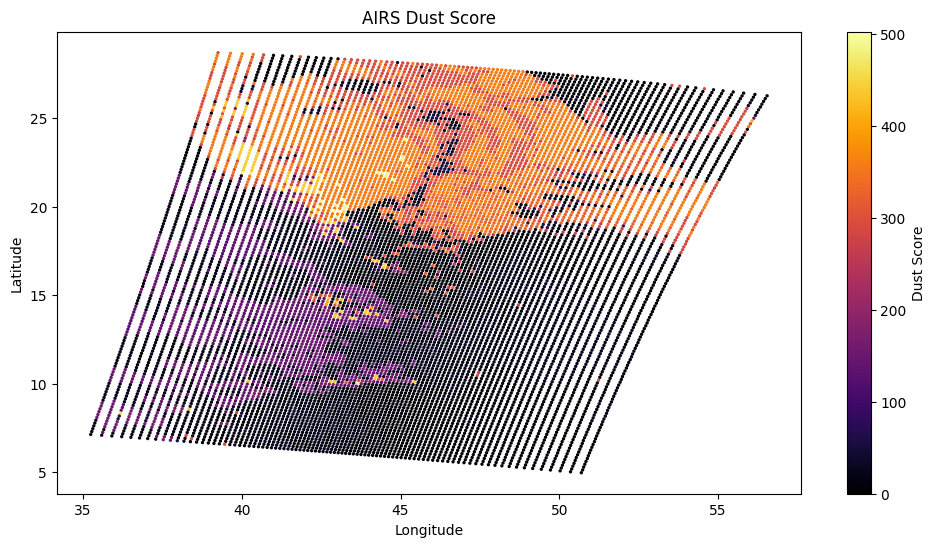

In [10]:
import matplotlib.pyplot as plt

lat = ds["Latitude"].values
lon = ds["Longitude"].values
dust = ds["dust_score"].values

plt.figure(figsize=(12,6))
sc = plt.scatter(lon, lat, c=dust, s=2, cmap="inferno")
plt.colorbar(sc, label="Dust Score")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("AIRS Dust Score")
plt.show()


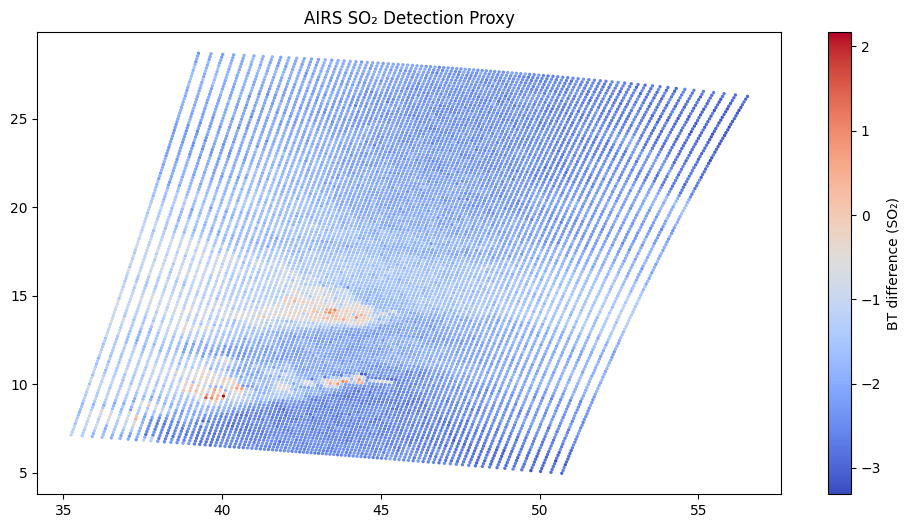

In [11]:
so2 = ds["BT_diff_SO2"].values

plt.figure(figsize=(12,6))
sc = plt.scatter(lon, lat, c=so2, s=2, cmap="coolwarm")
plt.colorbar(sc, label="BT difference (SO₂)")
plt.title("AIRS SO₂ Detection Proxy")
plt.show()
